In [1]:
import pandas as pd

df = pd.read_csv('datasets/vm_power_dataset.csv')
df.head()

,_time,vm_id,cpuload,disk_free,disk_total,disk_used,disk_used_percentage,mem_free,mem_total,mem_used,...,scaph_process_cpu_usage_percentage,scaph_process_disk_read_bytes,scaph_process_disk_total_read_bytes,scaph_process_disk_total_write_bytes,scaph_process_disk_write_bytes,scaph_process_memory_bytes,scaph_process_memory_virtual_bytes,scaph_process_power_consumption_microwatts,uptime_hours,vm_power_watts
0,2025-08-04 06:00:00+00:00,306,0.013463,3.435974e+10,3.435974e+10,0.0,0.0,355667968.0,2.147484e+09,1.791816e+09,...,0.071093,0.0,2.705371e+09,2.744689e+10,0.0,2.143072e+09,7.446151e+09,63082.947669,635.190833,0.063083
1,2025-08-04 06:02:00+00:00,306,0.000000,3.435974e+10,3.435974e+10,0.0,0.0,355409920.0,2.147484e+09,1.792074e+09,...,0.079704,0.0,2.705371e+09,2.744713e+10,0.0,2.143072e+09,7.446151e+09,61321.703358,635.210833,0.061322
2,2025-08-04 06:03:00+00:00,306,0.012445,3.435974e+10,3.435974e+10,0.0,0.0,355164160.0,2.147484e+09,1.792319e+09,...,0.077035,0.0,2.705371e+09,2.744718e+10,28672.0,2.143072e+09,7.446151e+09,61328.952588,635.227222,0.061329
3,2025-08-04 06:08:00+00:00,306,0.011926,3.435974e+10,3.435974e+10,0.0,0.0,365039616.0,2.147484e+09,1.782444e+09,...,0.077114,0.0,2.705371e+09,2.744793e+10,20480.0,2.143072e+09,7.446151e+09,53760.042191,635.310556,0.053760
4,2025-08-04 06:10:00+00:00,306,0.011713,3.435974e+10,3.435974e+10,0.0,0.0,365039616.0,2.147484e+09,1.782444e+09,...,0.077024,0.0,2.705371e+09,2.744796e+10,4096.0,2.143072e+09,7.446151e+09,59382.688984,635.343889,0.059383


In [2]:
features = [
    'cpuload',
    'mem_used_percentage',
    'mem_total',
    'mem_used',
    'disk_used_percentage',
    'disk_total',
    'disk_used',
    'uptime',
    'scaph_process_cpu_usage_percentage',
    'scaph_process_memory_bytes',
    'scaph_process_memory_virtual_bytes',
    'scaph_process_disk_read_bytes',
    'scaph_process_disk_write_bytes',
    'scaph_process_power_consumption_microwatts'
]


In [3]:
from sklearn.preprocessing import StandardScaler

# Drop NaNs
merged_df = df[features].dropna()

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df)

In [5]:
from keras.models import Model
from keras.layers import Input, Dense

input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)

# Decoder
decoded = Dense(16, activation="relu")(encoded)
decoded = Dense(input_dim, activation="linear")(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

2025-08-06 11:13:04.966126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754475184.980016   35436 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754475184.984508   35436 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754475184.995690   35436 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754475184.995709   35436 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754475184.995711   35436 computation_placer.cc:177] computation placer alr

In [7]:
autoencoder.fit(X_scaled, X_scaled,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_split=0.1)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1794 - val_loss: 0.0740
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1640 - val_loss: 0.0653
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1500 - val_loss: 0.0578
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1381 - val_loss: 0.0513
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1271 - val_loss: 0.0457
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1172 - val_loss: 0.0409
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1092 - val_loss: 0.0368
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1013 - val_loss: 0.0334
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0955 - val_loss: 0.0305
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0891 - val_loss: 0.0282
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0845 - val_loss: 0.0260
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0798 - val_loss: 0.0242
E

In [8]:
import numpy as np

# Predict/reconstruct
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [9]:
# Simple threshold: mean + 3 * std
threshold = np.mean(mse) + 3 * np.std(mse)

# Flag anomalies
anomalies = mse > threshold

In [10]:
merged_df['reconstruction_error'] = mse
merged_df['is_anomaly'] = anomalies

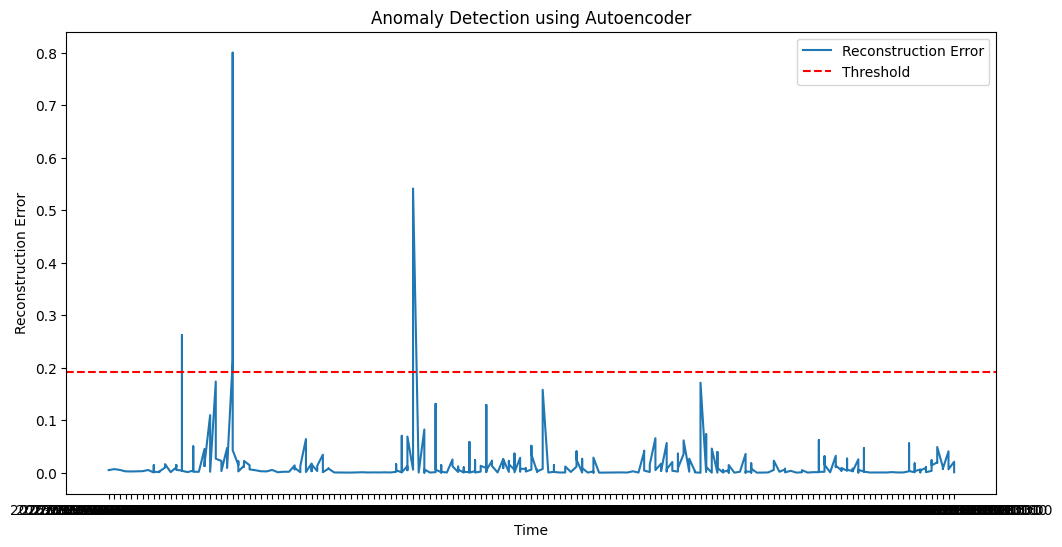

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['_time'], mse, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title("Anomaly Detection using Autoencoder")
plt.xlabel("Time")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.show()